<a href="https://colab.research.google.com/github/Darsenvale/Analysis_of_IT-jobs_and_courses/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

План: 
1. Модификация данных, привести к общему рабочему виду
  1. Преобразовать зарплаты в рабочий вид
  2. Перевести валютные зарплаты в рубли
  3. Преобразовать навыки в рабочий вид
  4. Преобразовать специализации
2. Создать очищенный датафрейм
3. Анализ специализаций вакансий
4. Анализ вакансий, не требующих опыта
5. Анализ навыков
8. Визуализация

#Подгрузка датасета

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import json

!gdown --id 1KWIZhrd7SRUHPI2foKZm2DxJCR4z8oqE

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1KWIZhrd7SRUHPI2foKZm2DxJCR4z8oqE
To: /content/region roles (26.05.22).xlsx
100% 84.4M/84.4M [00:00<00:00, 124MB/s]


In [ ]:
data_xlsx = pd.read_excel('/content/region roles (26.05.22).xlsx')
#Преобразуем датасет в csv формат
data_xlsx.to_csv('data_csv')

In [ ]:
raw_dataset = pd.read_csv('data_csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#создадим копию датасета для дальнейшей работы. Чтобы не приходилось повторно загружать датасет в непредвиденных случаях
dataset = raw_dataset
dataset.head()

,Unnamed: 0,Unnamed: 0.1,id,premium,name,department,has_test,response_letter_required,area,salary,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...",...,[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,2,55116066,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,...,[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
3,3,3,54031261,False,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...",...,[],[],[],False,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN
4,4,4,55243040,False,Специалист по защите информации,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...",...,[],[],[],False,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   Unnamed: 0.1              69656 non-null  int64  
 2   id                        69656 non-null  int64  
 3   premium                   69656 non-null  bool   
 4   name                      69656 non-null  object 
 5   department                5263 non-null   object 
 6   has_test                  69656 non-null  bool   
 7   response_letter_required  69656 non-null  bool   
 8   area                      69656 non-null  object 
 9   salary                    37590 non-null  object 
 10  type                      69656 non-null  object 
 11  address                   40318 non-null  object 
 12  response_url              1 non-null      object 
 13  sort_point_distance       0 non-null      float64
 14  publis

В датасете 69656 записей о вакансиях. Наибольшее количетсов пропусков в столбцах "Отдел", "Внутреннее интервью", "Контакты" и столбцах с зарплатой. Для анализа нам потребуются колонки с зарплатами, профобласть, наименования вакансий, ключевые навыки.

#Привести данные к рабочим форматам

Преобразуем специализацию

In [ ]:
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []

dataset['specializations_json'] = dataset['specializations'].apply(text_to_json)
dataset['specializations_json']

0        [{'id': '1.172', 'name': 'Начальный уровень, М...
1        [{'id': '1.221', 'name': 'Программирование, Ра...
2        [{'id': '1.221', 'name': 'Программирование, Ра...
3        [{'id': '1.110', 'name': 'Компьютерная безопас...
4        [{'id': '1.110', 'name': 'Компьютерная безопас...
                               ...                        
69651    [{'id': '1.221', 'name': 'Программирование, Ра...
69652    [{'id': '1.221', 'name': 'Программирование, Ра...
69653    [{'id': '9.94', 'name': 'Информационные технол...
69654    [{'id': '9.94', 'name': 'Информационные технол...
69655    [{'id': '9.94', 'name': 'Информационные технол...
Name: specializations_json, Length: 69656, dtype: object

In [ ]:
def return_indexed(data):
    return data[0]['profarea_name']
dataset['prof_area'] = dataset['specializations_json'].apply(return_indexed)

In [ ]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []

dataset['prof_name'] = dataset['specializations_json'].apply(get_values)


Преобразуем зарплаты

In [ ]:
#Трансформируем в Json для дальнешей работы
dataset['salary_json'] = dataset['salary'].fillna('{}').apply(eval)

#Пишем функцию для вычленения начальной зарплаты в отдельную колонку
def get_min_salary(json):
  try:
    return json['from']
  except:
    return None

#Создаём отдельную колонку с минимальными зарплатами
dataset['min_salary'] = dataset['salary_json'].apply(get_min_salary)
dataset['min_salary']

0             NaN
1         25000.0
2             NaN
3         26000.0
4         20000.0
           ...   
69651         NaN
69652    130000.0
69653     50000.0
69654     85000.0
69655         NaN
Name: min_salary, Length: 69656, dtype: float64

In [ ]:
#Пишем функцию для вычленения начальной зарплаты в отдельную колонку
def get_max_salary(json):
  try:
    return json['from']
  except:
    return None

#Создаём отдельную колонку с минимальными зарплатами
dataset['max_salary'] = dataset['salary_json'].apply(get_max_salary)
dataset['max_salary']

0             NaN
1         25000.0
2             NaN
3         26000.0
4         20000.0
           ...   
69651         NaN
69652    130000.0
69653     50000.0
69654     85000.0
69655         NaN
Name: max_salary, Length: 69656, dtype: float64

In [ ]:
#Для преобразования валютных зарплат в рублевые необходимо создать колонку валют
def get_currency(json):
  try:
    return json['currency']
  except:
    return None

#Создаем колонку валют
dataset['currency'] = dataset['salary_json'].apply(get_currency)
dataset['currency']

0        None
1         RUR
2        None
3         RUR
4         RUR
         ... 
69651    None
69652     RUR
69653     RUR
69654     RUR
69655    None
Name: currency, Length: 69656, dtype: object

In [ ]:
#Добавляем курс валют
rates = dict(RUR=1, USD=60, EUR=59, KZT=0.13)

#Конвертируем валютные зарплаты
dataset['converted_to_rur_min'] = dataset['currency'].map(rates) * dataset['min_salary']
dataset['converted_to_rur_max'] = dataset['currency'].map(rates) * dataset['max_salary']


Преобразуем списки требуемых навыков

In [ ]:
dataset['skills_json'] = dataset['key_skills'].apply(text_to_json)

dataset['skill_list'] = dataset['skills_json'].apply(get_values)

dataset['skill_list']

0                                                       []
1                        [Git, SQL, Тестирование, C#, API]
2        [SQL, Linux, Информационная безопасность, Рабо...
3        [Пользователь ПК, Работа в команде, 1С: Предпр...
4        [MS Dos, Диагностика ПК, Компьютер, Работа в у...
                               ...                        
69651                                                   []
69652    [1С: Управление Торговлей, 1С: Предприятие 8, ...
69653    [Организаторские навыки, Работа в команде, Упр...
69654                                                   []
69655    [Информационная безопасность, Аудит безопаснос...
Name: skill_list, Length: 69656, dtype: object

Преобразуем колонку требуемого опыта

In [ ]:
dataset['exp_json'] = dataset['experience'].apply(text_to_json)

def get_exp(json):
  try:
    return json['name']
  except:
    return None

dataset['clean_exp'] = dataset['exp_json'].apply(get_exp)
dataset['clean_exp']

0                 Нет опыта
1        От 1 года до 3 лет
2             От 3 до 6 лет
3                 Нет опыта
4                 Нет опыта
                ...        
69651         От 3 до 6 лет
69652    От 1 года до 3 лет
69653    От 1 года до 3 лет
69654         От 3 до 6 лет
69655           Более 6 лет
Name: clean_exp, Length: 69656, dtype: object

#Создаём датафрейм с необходимыми колонками в удобных форматах

In [ ]:
#создаём пустой датафрейм
df = pd.DataFrame()

In [ ]:
#переносим необходимые для анализа колонки
df['#'] = dataset['Unnamed: 0.1']
df['Вакансия'] = dataset['name']
df['Навыки'] = dataset['skill_list']
df['Регион'] = dataset['region']
df['Отрасль'] = dataset['prof_area']
df['Специализация'] = dataset['prof_name']
df['Опыт'] = dataset['clean_exp']
df['Зарплата от'] = dataset['converted_to_rur_min']
df['Зарплата до'] = dataset['converted_to_rur_max']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #              69656 non-null  int64  
 1   Вакансия       69656 non-null  object 
 2   Навыки         69656 non-null  object 
 3   Регион         69656 non-null  object 
 4   Отрасль        69656 non-null  object 
 5   Специализация  69656 non-null  object 
 6   Опыт           69656 non-null  object 
 7   Зарплата от    34074 non-null  float64
 8   Зарплата до    34074 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 4.8+ MB


In [ ]:
df.head(20)

,#,Вакансия,Навыки,Регион,Отрасль,Специализация,Опыт,Зарплата от,Зарплата до
0,0,Младший специалист ручного тестирования,[],Астраханская область,"Информационные технологии, интернет, телеком","[Начальный уровень, Мало опыта, Тестирование, ...",Нет опыта,NaN,NaN
1,1,Тестировщик.Net,"[Git, SQL, Тестирование, C#, API]",Астраханская область,"Информационные технологии, интернет, телеком","[Программирование, Разработка, Инженер, Тестир...",От 1 года до 3 лет,25000.0,25000.0
2,2,Пентестер,"[SQL, Linux, Информационная безопасность, Рабо...",Астраханская область,"Информационные технологии, интернет, телеком","[Программирование, Разработка, Инженер, Тестир...",От 3 до 6 лет,NaN,NaN
3,3,Ведущий Специалист по информационным технологиям,"[Пользователь ПК, Работа в команде, 1С: Предпр...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,26000.0,26000.0
4,4,Специалист по защите информации,"[MS Dos, Диагностика ПК, Компьютер, Работа в у...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,20000.0,20000.0
5,5,Специалист по защите информации,[],Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,15000.0,15000.0
6,6,Ведущий специалист по информационным технологиям,"[Администрирование сетевого оборудования, Заку...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",От 3 до 6 лет,NaN,NaN
7,7,Специалист по защите информации,"[Пользователь ПК, Работа в команде, Грамотная ...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,27000.0,27000.0
8,8,Оператор организационного сектора,"[Пользователь ПК, Работа в команде, Грамотная ...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,30000.0,30000.0
9,9,Специалист по информационной безопасности,[],Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",От 3 до 6 лет,15000.0,15000.0


In [ ]:
exp_vacancy = df.groupby('Вакансия')['Опыт']
exp_profarea = df.groupby('Опыт')['Отрасль']

In [ ]:
sphere = df['Специализация'].explode()
sphere.value_counts().head(20)

Инженер                                  32381
Программирование, Разработка             24349
Системы управления предприятием (ERP)    18222
Поддержка, Helpdesk                      15282
Системный администратор                  15207
Начальный уровень, Мало опыта            14883
Web инженер                              14408
Web мастер                               14378
Аналитик                                 13223
Интернет                                 12354
Другое                                   12116
Сетевые технологии                        9787
Управление персоналом                     8414
Рекрутмент                                8399
Управление проектами                      7260
Агент                                     6176
Прямые продажи                            6127
Менеджер по работе с клиентами            6052
Недвижимость                              5797
Развитие персонала                        5706
Name: Специализация, dtype: int64

In [ ]:
skills = df['Навыки'].explode()
skills.value_counts().head(20)

Работа в команде          8057
Грамотная речь            6734
SQL                       6393
Linux                     4943
Git                       4587
Английский язык           4454
Подбор персонала          4326
Ведение переговоров       4111
Управление проектами      3697
Python                    3249
Деловое общение           3235
Пользователь ПК           3218
Обучение и развитие       3206
Активные продажи          3052
Телефонные переговоры     2818
JavaScript                2774
Организаторские навыки    2621
1С программирование       2598
PostgreSQL                2565
Adobe Photoshop           2403
Name: Навыки, dtype: int64

In [ ]:
exp = df['Опыт']
exp.value_counts()

От 1 года до 3 лет    34989
От 3 до 6 лет         19823
Нет опыта             12646
Более 6 лет            2198
Name: Опыт, dtype: int64

In [ ]:
exp_by_profarea = df.groupby(['Отрасль','Опыт'])['Зарплата от'].mean()
exp_by_profarea = exp_by_profarea.dropna().astype(int)

In [ ]:
exp_by_profarea.to_frame()

Зарплата от
Отрасль                         Опыт                           
Автомобильный бизнес            Нет опыта                214000
                                От 1 года до 3 лет        43333
Административный персонал       Нет опыта                 44175
                                От 1 года до 3 лет        34526
                                От 3 до 6 лет             44000
...                                                         ...
Управление персоналом, тренинги От 3 до 6 лет             62201
Юристы                          Более 6 лет               44000
                                Нет опыта                 71628
                                От 1 года до 3 лет        74583
                                От 3 до 6 лет             40000

[81 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

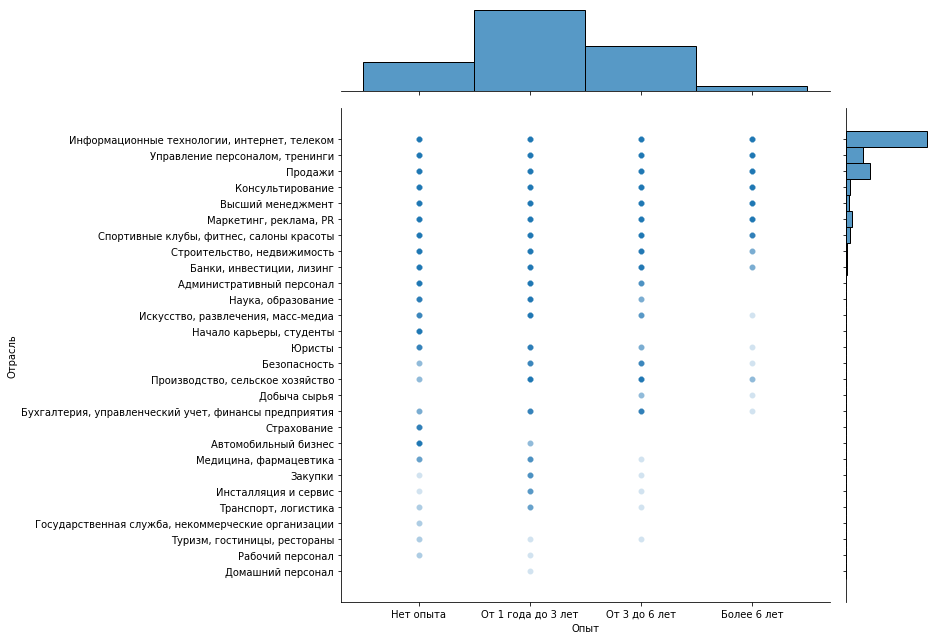

In [ ]:
sns.jointplot(x=df['Опыт'], y=df['Отрасль'], size=9, alpha=0.2)
plt.show

In [ ]:
filter_no_exp = df['Опыт'] == 'Нет опыта'


df_noexp = df[filter_no_exp]

noexp = df_noexp['Отрасль'].value_counts()

In [ ]:
df['Зарплата от'].dropna().astype(int)

1         25000
3         26000
4         20000
5         15000
7         27000
          ...  
69647    130000
69648     20000
69652    130000
69653     50000
69654     85000
Name: Зарплата от, Length: 34074, dtype: int64

Выведем график соотношения количества вакансий не требующих опыта и начальной зарплаты

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


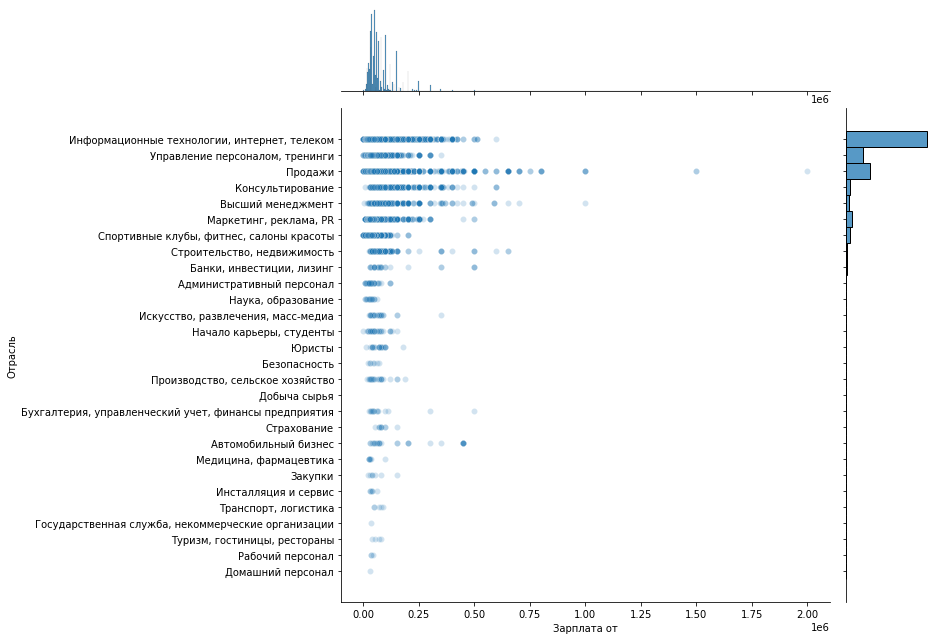

In [ ]:
sns.jointplot(x=df['Зарплата от'], y=df['Отрасль'], size=9, alpha=0.2)

Здесь видно, что отрасль ИТ предоставляет наибольшее количество вакансий, не требующих опыта. По начальному уровню заработной платы, сфера ИТ идёт после Продаж, находясь на втором месте

In [ ]:
mean_salary_profarea = df.groupby('Отрасль')['Зарплата от'].mean()
mean_salary_profarea = mean_salary_profarea.dropna().astype(int)
mean_salary_profarea.sort_values(ascending=False).to_frame()[:10]

,Зарплата от
Отрасль,
Автомобильный бизнес,195714
Консультирование,174233
"Банки, инвестиции, лизинг",135642
Высший менеджмент,118112
"Бухгалтерия, управленческий учет, финансы предприятия",96687
"Строительство, недвижимость",96600
Продажи,95845
Страхование,85700
"Информационные технологии, интернет, телеком",79392


Сфера ИТ находится на 9 месте по среднему уровню зарплаты. Наиболее оплачиваемыми являются Автомобильный бизнес и Консультирование (Последнее также является сферой компетенций заказчика)

Выведем диаграму соотношения вакансий по отраслям

In [ ]:
profarea_counts = df['Отрасль'].value_counts()

In [ ]:
profarea_other = profarea_counts[profarea_counts < 3000]
profarea_counts = profarea_counts [profarea_counts > 3000]

In [ ]:
#Уберем сферы с количеством вакансий до 3000 в категорию "Другое"
profarea_counts['Другое'] = profarea_other.sum()

In [ ]:
profarea_counts

Информационные технологии, интернет, телеком    40768
Продажи                                         11849
Управление персоналом, тренинги                  8465
Маркетинг, реклама, PR                           3094
Другое                                           5480
Name: Отрасль, dtype: int64

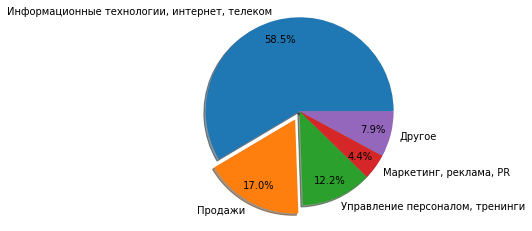

In [ ]:
labels = profarea_counts.index
sizes = profarea_counts.values
explode = (0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0, pctdistance=0.80)
ax1.axis('equal') 
plt.show()

Как мы видим здесь, абсолютное большинство вакансий находятся в отрасли Информационных технологий. 

Определим соотношение требуемых навыков со средней зарплатой

In [ ]:
skill_salary_df = df[['Навыки', 'Зарплата от']]


skill_salary = skill_salary_df.explode('Навыки').dropna()

skill_salary_mean = skill_salary.groupby('Навыки')['Зарплата от'].mean()

skill_salary_mean.dropna().astype(int).sort_values(ascending=False)[:20]

Навыки
Stress Management              590000
System Integration             539850
EdTech                         500000
Монетизация                    500000
HRTech                         500000
срм                            500000
ретеншн                        500000
недвижимость от застройщика    500000
International Contracts        489700
Tender Management              489700
Planning                       489700
Coaching                       488962
People Management              473750
hebrew                         450000
иврит                          450000
poker                          450000
португальский                  450000
Бразилия                       450000
Portuguese                     450000
Vue.JS CLI                     425000
Name: Зарплата от, dtype: int64

Наиболее ценными навыками являются Стрессоустойчивость, Системная интеграция, Образовательные технологии

# Проанализируем непосредственно сферу Информационный технологий

In [ ]:
filter = df['Отрасль']=='Информационные технологии, интернет, телеком'

df_it_only = df[filter]
df_it_only.head(20)

,#,Вакансия,Навыки,Регион,Отрасль,Специализация,Опыт,Зарплата от,Зарплата до
0,0,Младший специалист ручного тестирования,[],Астраханская область,"Информационные технологии, интернет, телеком","[Начальный уровень, Мало опыта, Тестирование, ...",Нет опыта,NaN,NaN
1,1,Тестировщик.Net,"[Git, SQL, Тестирование, C#, API]",Астраханская область,"Информационные технологии, интернет, телеком","[Программирование, Разработка, Инженер, Тестир...",От 1 года до 3 лет,25000.0,25000.0
2,2,Пентестер,"[SQL, Linux, Информационная безопасность, Рабо...",Астраханская область,"Информационные технологии, интернет, телеком","[Программирование, Разработка, Инженер, Тестир...",От 3 до 6 лет,NaN,NaN
3,3,Ведущий Специалист по информационным технологиям,"[Пользователь ПК, Работа в команде, 1С: Предпр...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,26000.0,26000.0
4,4,Специалист по защите информации,"[MS Dos, Диагностика ПК, Компьютер, Работа в у...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,20000.0,20000.0
5,5,Специалист по защите информации,[],Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,15000.0,15000.0
6,6,Ведущий специалист по информационным технологиям,"[Администрирование сетевого оборудования, Заку...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",От 3 до 6 лет,NaN,NaN
7,7,Специалист по защите информации,"[Пользователь ПК, Работа в команде, Грамотная ...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,27000.0,27000.0
8,8,Оператор организационного сектора,"[Пользователь ПК, Работа в команде, Грамотная ...",Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",Нет опыта,30000.0,30000.0
9,9,Специалист по информационной безопасности,[],Астраханская область,"Информационные технологии, интернет, телеком","[Компьютерная безопасность, Сетевые технологии...",От 3 до 6 лет,15000.0,15000.0


Определим наиболее требуемые навыки в сфере Информационных технологий

In [ ]:
skills_it = df_it_only['Навыки'].explode()
skills.value_counts().head(20)

Работа в команде          8057
Грамотная речь            6734
SQL                       6393
Linux                     4943
Git                       4587
Английский язык           4454
Подбор персонала          4326
Ведение переговоров       4111
Управление проектами      3697
Python                    3249
Деловое общение           3235
Пользователь ПК           3218
Обучение и развитие       3206
Активные продажи          3052
Телефонные переговоры     2818
JavaScript                2774
Организаторские навыки    2621
1С программирование       2598
PostgreSQL                2565
Adobe Photoshop           2403
Name: Навыки, dtype: int64

Так мы узнали, что наиболее требуемыми являются софт-скиллы (Работа в команде и Грамотная речь), так и хард-скиллы (SQL, Linux, Git)

Оценим среднюю зарплату по требуемым ИТ навыкам

In [ ]:
skill_salary_df = df_it_only[['Навыки', 'Зарплата от']]


skill_salary_it = skill_salary_df.explode('Навыки').dropna()

skill_salary_mean = skill_salary_it.groupby('Навыки')['Зарплата от'].mean()

skill_salary_mean.dropna().astype(int).sort_values(ascending=False)[:20]

Навыки
HRTech                            500000
EdTech                            500000
Strategic Planning                400000
Marketing Analysis                400000
Business Development              400000
Marketing Strategy Development    400000
Operations Management             400000
Business Process Management       400000
IaC                               360000
Amazon                            360000
PyTorch                           355000
Apache Spark                      354000
Sphinx                            350000
spiral framework                  350000
Pulumi                            350000
Livedata                          350000
hashicorp                         350000
web3.js                           350000
Cordova                           350000
FullStack                         343333
Name: Зарплата от, dtype: int64

Выведем топ 20 вакансий в сфере ИТ

In [ ]:
#Приведем 1С вакансии к общему виду
list_replaces = [('Программист 1C','Программист 1С'),('разработчик 1с','Программист 1С'),('разработчик 1с','Программист 1С'),('программист 1 с','Программист 1С'),('инженер - Программист 1С','Программист 1С')] 
for el in list_replaces: 
 df_it_only['Вакансия'] = df_it_only.Вакансия.apply(lambda x: x.replace(el[0],el[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
top_vacancy = df_it_only['Вакансия'].value_counts()[:20]
top_vacancy

Системный администратор                                       1657
Программист 1С                                                1439
Специалист технической поддержки                               478
Инженер-программист                                            328
Графический дизайнер                                           314
Инженер технической поддержки                                  273
Дизайнер                                                       251
Технический писатель                                           213
Руководитель проекта                                           209
Специалист по информационной безопасности                      185
Frontend-разработчик                                           184
DevOps инженер                                                 180
Программист                                                    179
Специалист службы поддержки в Яндекс Бизнес                    168
Младший специалист ручного тестирования                       

<function matplotlib.pyplot.show(*args, **kw)>

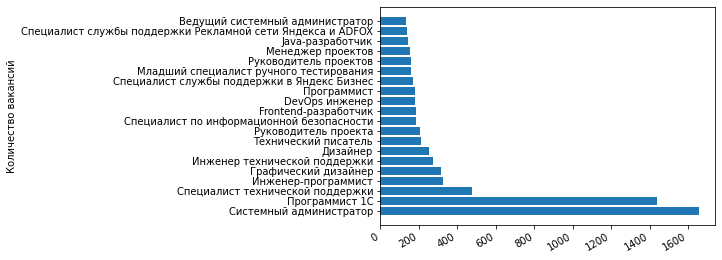

In [ ]:
plt.ylabel('Количество вакансий')
plt.xticks(rotation = 30, ha = 'right')
plt.barh(top_vacancy.index, top_vacancy.values)
plt.show

Наиболее популярной в сфере ИТ является вакансия системного администратора

In [ ]:
salary_vacancy = df_it_only.groupby('Вакансия')['Зарплата от'].mean()

salary_vacancy_top = salary_vacancy.dropna().astype(int).sort_values(ascending=False)[:10]

<function matplotlib.pyplot.show(*args, **kw)>

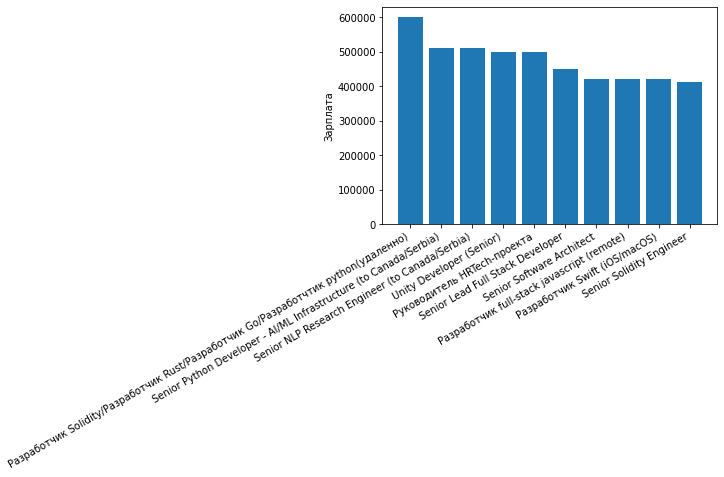

In [ ]:
plt.ylabel('Зарплата')
plt.xticks(rotation = 30, ha = 'right')
plt.bar(salary_vacancy_top.index, salary_vacancy_top.values)
plt.show

В сфере ИТ довольно наибольшее количество начальных вакансий, не требующих опыта. Так же сфера информационных технологий находится на втором месте по уровню зарплаты для начальных позиций, так и является лидером среди прочих сфер по общему количеству вакансий. Поэтому развитие направления курсов даже при насыщенном заполнении рынка должно быть прибыльным.

In [ ]:
import time
from google.colab import files
name = 'вакансии_модифицированные'
df_it_only.to_csv(name)
files.download(name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>